In [6]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc

## Load data

In [7]:
# Load AURIN data
prop_price = pd.read_csv('2014-2018 median_house_price.csv', index_col = 'Code')
income = pd.read_csv('2014-2018 mean_income.csv', index_col = 'Code')
population = pd.read_csv('2014-2018 population and density.csv', index_col = 'Code')
# calculate median property price growth rate for year 2015-2018
prop_growth_rate = pd.DataFrame(prop_price.Name.copy())
for i in range(2015, 2019):
    prop_growth_rate[str(i) + 'gr_med'] = np.around(prop_price[str(i) + 'Median_price'].values /
                                                     prop_price[str(i-1) + 'Median_price'].values, 2)

In [17]:
income.head(2)

,Name,2014mean_income,2015mean_income,2016mean_income,2017mean_income,2018mean_income
Code,,,,,,
20102,Creswick - Daylesford - Ballan,32662,37320,30066.0,35822,56790
20202,Heathcote - Castlemaine - Kyneton,30207,31110,36923.0,37380,45500


In [15]:
# Load SA4 shape files
# Statistical Area Level 4 (SA4) ASGS Ed 2016 Digital Boundaries in MapInfo Interchange Format 
# sa4 = gpd.read_file('https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&1270055001_sa4_2016_aust_midmif.zip&1270.0.55.001&Data%20Cubes&7512AFCD3D8FED2DCA257FED001451F6&0&July%202016&12.07.2016&Latest')
# sa4['SA4_CODE_2016'] = sa4['SA4_CODE_2016'].astype(int)
# sa4 = sa4.set_index('SA4_CODE_2016')
# sa4_vic = sa4[sa4['STATE_NAME_2016']=='Victoria'].loc[:, ['geometry']]

In [9]:
# Load SA3 shape files
# Statistical Area Level 3 (SA3) ASGS Ed 2016 Digital Boundaries in MapInfo Interchange Format
sa3 = gpd.read_file('https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&1270055001_sa3_2016_aust_midmif.zip&1270.0.55.001&Data%20Cubes&31ACD8D865DE06E5CA257FED00144DEE&0&July%202016&12.07.2016&Latest')
sa3['SA3_CODE_2016'] = sa3['SA3_CODE_2016'].astype(int)
sa3 = sa3.set_index('SA3_CODE_2016')
sa3_mel = sa3.loc[income.index, ['geometry']]

In [10]:
dfs = [prop_price, income, population, prop_growth_rate]
full_data = sa3_mel
for df in dfs:
    full_data = full_data.merge(df, left_index=True, right_index=True)
full_data.head(2)

,geometry,Name_x,2014Median_price,2015Median_price,2016Median_price,2017Median_price,2018Median_price,Name_y,2014mean_income,2015mean_income,...,2016Population_density(person/km2),2017Total_population,2017Population_density(person/km2),2018Total_population,2018Population_density(person/km2),Name_y,2015gr_med,2016gr_med,2017gr_med,2018gr_med
Code,,,,,,,,,,,,,,,,,,,,,
20102,"POLYGON ((143.67535 -37.32521, 143.66604 -37.3...",Creswick - Daylesford - Ballan,350000.0,331500.0,360000.0,385000.0,425000.0,Creswick - Daylesford - Ballan,32662,37320,...,7.8,28979,7.9,29309,8.0,Creswick - Daylesford - Ballan,0.95,1.09,1.07,1.10
20202,"POLYGON ((143.97372 -37.03421, 143.97242 -37.0...",Heathcote - Castlemaine - Kyneton,389000.0,375000.0,395000.0,429750.0,467500.0,Heathcote - Castlemaine - Kyneton,30207,31110,...,12.3,48821,12.5,49603,12.7,Heathcote - Castlemaine - Kyneton,0.96,1.05,1.09,1.09


## Choropleth

In [11]:
hue_name = {'Property Price Growth Rate': 'gr_med', 'Median Property Price': 'Median_price', 'Mean Income': 'mean_income',
            'Population Density': 'Population_density(person/km2)', 'Total Population': 'Total_population'}

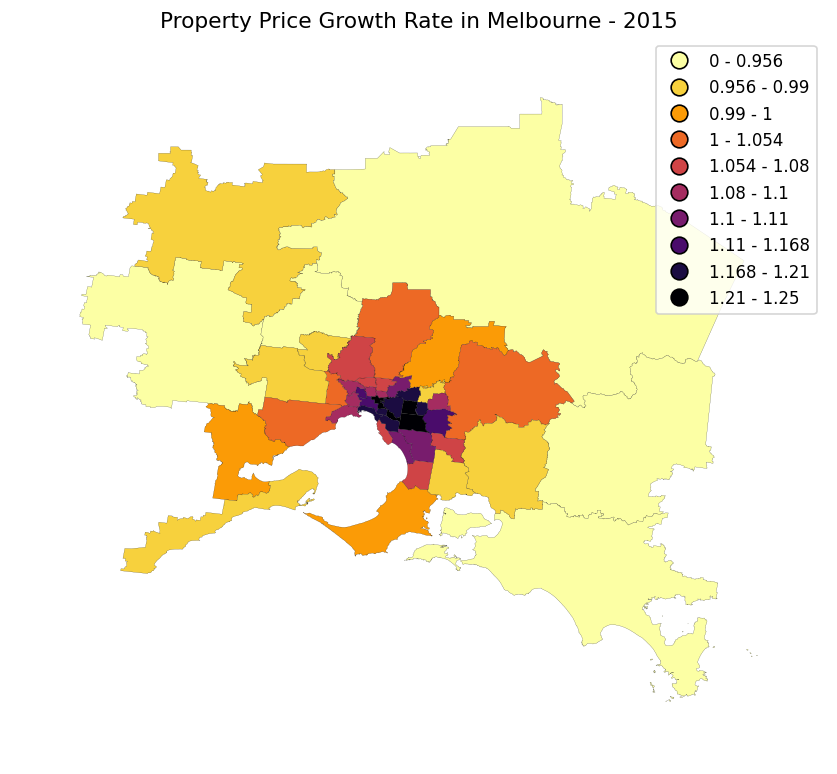

In [12]:
# change year and indicator to view different Choropleth
year = '2015'
indicator = 'Property Price Growth Rate' # ['Property Price Growth Rate', 'Median Property Price', 'Mean Income', 'Population Density', 'Total Population']
hue = year + hue_name[indicator]

fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=120)
scheme = mc.Quantiles(full_data[hue], k=10) # Set up the color sheme
gplt.choropleth(full_data, 
    hue=hue, 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
ax.set_title(indicator + ' in Melbourne - ' + year, fontsize=13);